In [1]:
xl = open("/Users/vibhav/My Drive/NIMF/NIMF/Tracker/Master Excels/excel_text.txt", "r")
xl_path = xl.read()

plot = open("/Users/vibhav/My Drive/NIMF/NIMF/Tracker/Master Excels/plots_text.txt", "r")
plot_path = plot.read()


In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.ticker as mtick

In [3]:
local_path = "/Users/vibhav/My Drive/NIMF/NIMF/Tracker/Untitled Folder/Metals and Food/"

In [4]:
bl_path = "/Users/vibhav/Downloads/Bloomberg 10 Year Govt Bond TR Index (3).xlsx"


In [5]:
def concatter2(file_name, col1, col2, rename_from, rename_to):
    local_df = pd.read_csv(local_path+file_name, index_col=0, parse_dates=True, dayfirst=True)
    local_df.dropna(inplace=True)
    last_date_in_local = local_df.index[0].to_pydatetime().strftime("%Y-%m-%d")

    bl_df = pd.read_excel(bl_path, sheet_name="Worksheet", usecols=[col1, col2], skiprows=7, index_col=0, parse_dates=True)
    bl_df.dropna(inplace=True)
    bl_df.index.rename("Date", inplace=True)
    bl_df.rename(columns={rename_from: rename_to}, inplace=True)

    final_df = pd.concat([bl_df[last_date_in_local:], local_df])
    return final_df

In [6]:
lmex = concatter2("lmex.csv", 28, 29, "PX_LAST.9", "lmex")

/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_22481/557946860.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  final_df = pd.concat([bl_df[last_date_in_local:], local_df])


In [7]:
lmex = lmex[::-1]

In [26]:
lmex

,lmex
Date,
2016-10-28,2486.6
2016-11-04,2535.5
2016-11-11,2696.4
2016-11-18,2644.5
2016-11-25,2840.5
...,...
2021-12-24,4466.0
2021-12-31,4502.0
2022-01-07,4524.0


In [9]:
lmex.pct_change()

,lmex
Date,
2016-10-28,NaN
2016-11-04,0.019665
2016-11-11,0.063459
2016-11-18,-0.019248
2016-11-25,0.074116
...,...
2021-12-24,0.022834
2021-12-31,0.008061
2022-01-07,0.004887


/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_22481/4250233847.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


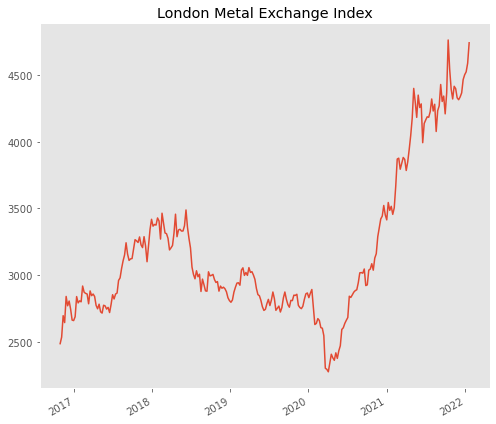

In [10]:
lmex["lmex"].plot(figsize=(7,6), x_compat=True)


plt.title('London Metal Exchange Index')
plt.grid(b=False)
plt.xlabel("")
plt.tight_layout()
plt.savefig('lmex.png', dpi=300, bbox_inches='tight')
plt.savefig("/Users/vibhav/My Drive/NIMF/NIMF/Tracker/Master PNGs/"+plot_path+"/lmex.png", dpi=150, bbox_inches='tight')

In [11]:
copper = concatter2("copper.csv", 31, 33, "Unnamed: 33", "Copper")

/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_22481/557946860.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  final_df = pd.concat([bl_df[last_date_in_local:], local_df])


In [12]:
copper

,Copper
Date,
2022-01-21,452.40
2022-01-14,442.05
2022-01-07,441.00
2021-12-31,446.35
2021-12-24,438.70
...,...
2016-11-25,266.80
2016-11-18,246.75
2016-11-11,250.90


In [13]:
copper[::-1].pct_change()*100

,Copper
Date,
2016-10-28,NaN
2016-11-04,3.259631
2016-11-11,10.772627
2016-11-18,-1.654045
2016-11-25,8.125633
...,...
2021-12-24,2.237241
2021-12-31,1.743788
2022-01-07,-1.198611


In [14]:
copper = copper/100

In [15]:
copper[::-1]

,Copper
Date,
2016-10-28,2.1935
2016-11-04,2.2650
2016-11-11,2.5090
2016-11-18,2.4675
2016-11-25,2.6680
...,...
2021-12-24,4.3870
2021-12-31,4.4635
2022-01-07,4.4100


/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_22481/1114478890.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


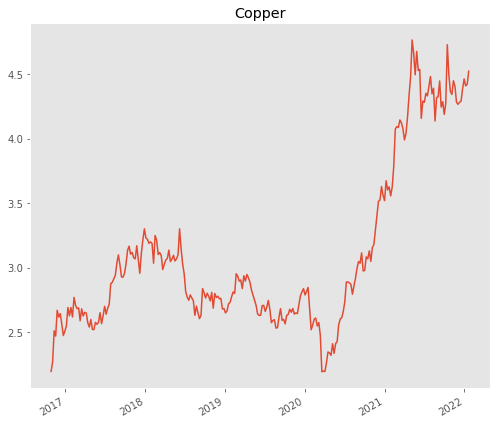

In [16]:
copper["Copper"].plot(figsize=(7,6), x_compat=True)


plt.title('Copper')
plt.grid(b=False)
plt.xlabel("")
plt.tight_layout()
plt.savefig('copper.png', dpi=300, bbox_inches='tight')
plt.savefig("/Users/vibhav/My Drive/NIMF/NIMF/Tracker/Master PNGs/"+plot_path+"/copper.png", dpi=150, bbox_inches='tight')

In [17]:
al = concatter2("al.csv", 35, 36, "PX_LAST.11", "Aluminium")

/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_22481/557946860.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  final_df = pd.concat([bl_df[last_date_in_local:], local_df])


In [18]:
al[::-1]

,Aluminium
Date,
2016-10-28,1718.75
2016-11-04,1717.25
2016-11-11,1743.50
2016-11-18,1697.75
2016-11-25,1758.75
...,...
2021-12-24,2839.50
2021-12-31,2803.00
2022-01-07,2907.50


In [19]:
al[::-1].pct_change()*100

,Aluminium
Date,
2016-10-28,NaN
2016-11-04,-0.087273
2016-11-11,1.528607
2016-11-18,-2.624032
2016-11-25,3.592991
...,...
2021-12-24,4.460590
2021-12-31,-1.285438
2022-01-07,3.728148


/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_22481/2376219153.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


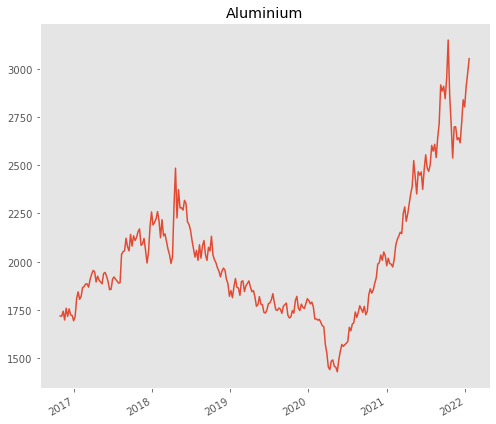

In [20]:
al["Aluminium"].plot(figsize=(7,6), x_compat=True)


plt.title('Aluminium')
plt.grid(b=False)
plt.xlabel("")
plt.tight_layout()
plt.savefig('al.png', dpi=300, bbox_inches='tight')
plt.savefig("/Users/vibhav/My Drive/NIMF/NIMF/Tracker/Master PNGs/"+plot_path+"/aluminium.png", dpi=150, bbox_inches='tight')

In [21]:
food = concatter2("food.csv", 38, 39, "PX_LAST.12", "food")

/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_22481/557946860.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  final_df = pd.concat([bl_df[last_date_in_local:], local_df])


In [22]:
food.dropna(inplace=True)

In [23]:
food

,food
Date,
2021-11-30,132.567
2021-10-31,131.119
2021-09-30,129.025
2021-08-31,132.178
2021-07-31,132.156
...,...
2017-02-28,107.023
2017-01-31,106.537
2016-12-31,102.327


In [24]:
food[::-1].pct_change()*100

,food
Date,
2016-10-31,NaN
2016-11-30,0.549467
2016-12-31,1.117633
2017-01-31,4.114261
2017-02-28,0.456180
...,...
2021-07-31,0.338623
2021-08-31,0.016647
2021-09-30,-2.385420


/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_22481/1725875204.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


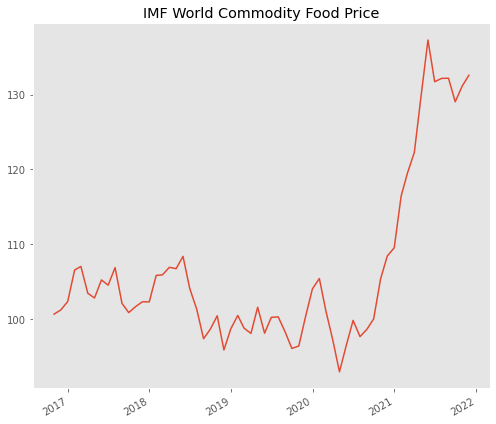

In [25]:
food["food"].plot(figsize=(7,6), x_compat=True)


plt.title('IMF World Commodity Food Price')
plt.grid(b=False)
plt.xlabel("")
plt.tight_layout()
plt.savefig('food.png', dpi=300, bbox_inches='tight')
plt.savefig("/Users/vibhav/My Drive/NIMF/NIMF/Tracker/Master PNGs/"+plot_path+"/food.png", dpi=150, bbox_inches='tight')